SVG file 'output/random_rectangles.svg' generated with 28 random rectangles.


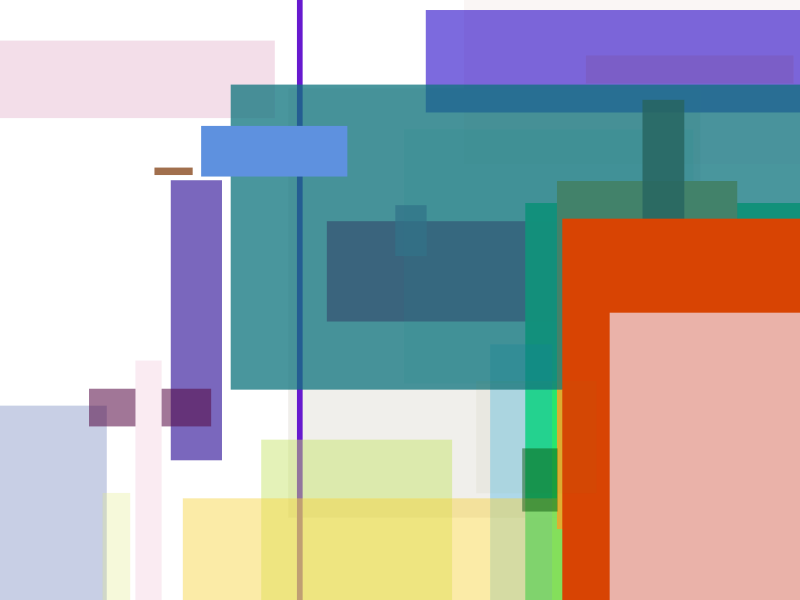

In [1]:
from image_generator import *

generate_svg_with_random_rectangles(num_rectangles=random.randint(10, 30), with_opacity=True, opacity_probability=0.7)
display_svg('output/random_rectangles.svg')


In [7]:
from processor import modify_floats_in_svg 

modify_floats_in_svg('output/random_rectangles.svg')


665.5130675546212
366.02063594542983
469.25082135271316
252.92834921760965
85.49998603755
371.9812559113726
275.7349063058274
335.59943854626164
449.5997981738051
228.90180789009082
132.3009010005458
24.684757966614985
572.0800678484828
379.22866280356556
175.84037851560825
43.70086941385196
41.5564342846979
384.8312784141859
681.6989232606223
758.2474446644342
213.40684058245677
84.6874736444927
241.55950952804503
419.76339108638564
91.73267058503293
135.64873536660323
302.7627573735585
173.9181545291416
341.39224363699
78.6870058413975
8.334339144055786
392.08975474396794
269.64758852198577
20.424626948334804
129.78565857284934
536.0991874999132
9.423870846167844
12.518279871756533
154.35289315130174
323.1800911467428
473.6265366381343
469.8385991463638
191.60937978344876
256.87323861448147
499.74552922471287
106.51932708466072
660.2710294384583
61.79626137483326
362.63791473106204
234.50750876610476
482.40498148888565
446.1605504620866
344.15277827079666
17.249654376039686
121.12098

In [ ]:
from encryption import *

seed = 2137

inputNumber = 665.5130675546212

encrypted = encrypt(['h','h','\0'], seed, inputNumber)

decrypted = decrypt(seed, encrypted)

print('encrypted:')
print(encrypted)
print('decrypted:')
print(decrypted)

key:
713950709
message:
['h', 'h', 'h']
ASCII message:
108111000
665.51307108111000
key:
713950709
encrypted:
665.51307754950509
decrypted:
108111000


In [2]:
from processor import modify_floats_in_svg_2
from encryption import *
from seed import seed

encrypt_lambda = lambda message, match : encrypt2(message, seed, float(match.group()))
modify_floats_in_svg_2("output/random_rectangles.svg", "output/modified_random_rectangles.svg", encrypt_lambda, "haslo")

[['A'], ['l'], ['a'], [' '], ['m'], ['a'], [' '], ['k'], ['o'], ['t'], ['a'], ['\x00']]
Modified SVG file saved to output/modified_random_rectangles.svg.


In [3]:
from processor import decrypt_message_from_svg
from encryption import *
from seed import seed

decrypt_lambda = lambda encoded_string, chunk_size : decrypt(seed, encoded_string, chunk_size)

file = "output/modified_random_rectangles.svg"
message = decrypt_message_from_svg(file, decrypt_lambda, chunk_size=3)

print(f"File: \"{file}\", contains decoded message: {message}")

File: "output/modified_random_rectangles.svg", contains decoded message: Ala ma ι̤˺5+ąʩýȽʶϮŪʳǣΰ˥ǭ˹ǳϋʥd̕ǽ{gŲ̢˲Ƽ˯Ϧʫȿõ͸ʴ˩Þʤ̣ĨĮ'˩à£ʦØŢʽɣ Ιʮ


In [4]:



# Add redundant attributes with specific probabilities
from signing import SVGProcessor

redundant_attributes = {
    'stroke-width': ('1', 0.1),
    'stroke-linecap': ('butt', 0.6),
    'stroke-linejoin': ('miter', 0.4),
    'preserveAspectRatio': ('xMidYMid meet', 0.5),
    'colour': ('red', 0.8)
}

epsilon = 1e-9

is_multiple_of_5 = lambda x: abs(x*100.0 % 5) < epsilon or abs(x*100.0 % 5 - 5) < epsilon

micro_changes = {
    'fill-opacity': (-0.02, 0.7, 1.0, is_multiple_of_5),
}

processor = SVGProcessor(redundant_attributes, micro_changes)

processor.process("output/random_rectangles.svg", "output/signed_output.svg")

results = processor.verify("output/signed_output.svg")

#redundant attributes
for attribute, stats in results[0].items():
    print(f"Attribute: {attribute}")
    print(f"  Expected Fraction: {stats['expected']}")
    print(f"  Actual Fraction: {stats['actual']}")
    print(f"  Matches: {stats['matches']}")
    print()
    
#micro value changes
for attribute, stats in results[1].items():
    print(f"Attribute: {attribute}")
    print(f"  Expected Fraction: {stats['expected']}")
    print(f"  Actual Fraction: {stats['actual']}")
    print(f"  Matches: {stats['matches']}")
    print()
    


Attribute: stroke-width
  Expected Fraction: 0.1
  Actual Fraction: 0.10714285714285714
  Matches: True

Attribute: stroke-linecap
  Expected Fraction: 0.6
  Actual Fraction: 0.6071428571428571
  Matches: True

Attribute: stroke-linejoin
  Expected Fraction: 0.4
  Actual Fraction: 0.39285714285714285
  Matches: True

Attribute: preserveAspectRatio
  Expected Fraction: 0.5
  Actual Fraction: 0.42857142857142855
  Matches: True

Attribute: colour
  Expected Fraction: 0.8
  Actual Fraction: 0.8571428571428571
  Matches: True

Attribute: fill-opacity
  Expected Fraction: 0.7
  Actual Fraction: 0.75
  Matches: True



Original:
![output/random_rectangles.svg](output/random_rectangles.svg)

Signed:
![output/signed_output.svg](output/signed_output.svg)

Naszym zadaniem była steganografia obrazów SVG za pomocą różnych technik. Pierwszym etapem było umieszczenie wiadomości wewnątrz obrazu w taki sposób, aby wprowadzone zmiany nie wpłynęły na jego finalny efekt wizualny. Dodaliśmy więc funkcjonalość, która pozwala na wstawianie podzielonych części wiadomości w zaszyfrowanej postaci do każdej liczby zmiennoprzecinkowej znajdującej się w obrazie. Zauważyliśmy, że ta metoda pozwala na ukrycie hasła tak, aby nawet spoglądając w kod nie można było jednoznacznie stwierdzić, że zostało w nim coś celowo zmienione. Oczywiście po enkrypcji przyszedł również czas na odzyskanie ukrytego hasła. Na podstawie znanego seeda udało nam się stworzyć funkcjonalność, która pozwala na uzyskanie z przerobionego obrazu naszej wcześniej ukrytej wiadomości. 
Następnie oprócz ukrywania samej wiadomości postanowiliśmy dodać również metodę, która pozwoli na sprawdzenie, czy dany obraz z pewnym prawdopodobieństwem posiada ukryte przez nas hasło. W ten sposób uzyskaliśmy możliwość swojego rodzaju podpisania obrazu również tak, aby podpis ten był niewidoczny na pierwszy rzut oka. Na podstawie przeskanowanego obrazu i sprawdzenia występowania odpowiednich elementów w obrazie sprawdzane jest, czy z podobnym prawdopodobieństwem one występują. Otrzymując wynik możemy porównać go z oczekiwanym, który pozwala nam stwierdzić, że z dużym prawdopodobieństwem ten obraz został podpisany właśnie przez nas.
Cały projekt uważamy za udany, który pozwolił nam zdobyć nowe, cenne doświadczenie oraz wiedzę. Steganografia to bardzo obszerny temat, który z pewnością jest aktualny i warto mieć świadomość występowania takich mechanizmów w praktyce.

# Schemat pierwszego algorytmu
Proces kodowania wiadomości wewnątrz obrazu.

![docs/schematic1.png](docs/schematic1.png)



# Schemat drugiego algorytmu

Proces modułowy z opcją dodania innych kryteriów oceny. Operacje dzieją się kolejno po sobie.

![docs/schematic2.png](docs/schematic2.png)

![docs/schematic3.png](docs/schematic3.png)